## Boston Housing Dataset
#### WWC-SV Python for Data Analysis Series at Netflix - August 2019

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import scipy.stats as spstats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#Load dataset from sklearn
import sklearn
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
#Load data into pandas dataframe
boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['medv']=boston.target

### EDA

EDA is a key part of analysis for any project. It helps us understand the data to identify ranges, outliers, trends, patterns, missing values and if required to implement any corrective methods.

In [4]:
#review datapoints
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Looks like all 14 datapoints are numeric. Note that medv is our target variable - price in 1000's'

#### Data Description

'CHAS' is the only binary variable in the dataset.

In [5]:
boston_df.shape

(506, 14)

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


As we had discussed in previous sessions, 50% is the median value of the data points. Please note the qunatiles, we will use them later in this notebook for q-q plots.

The means and standard deviations will be used for hypothesis tests.

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


We could convert 'CHAS' to an object datatype. But, let's leave it as is since we are not building any models in this notebook.'

There are no null values in the dataset. All fields were loaded as float64.
We have 506 rows of data with 13 predictors. All data points are numeric except for Charles River Dummy Variable and Index of accessibility to radial highways(point for discussion - should be considered numeric or categorical). 

##### Plot distribution of Value of Owner-occupied homes.

Plotting the distribution helps observe the range of the data, mean, median, mode, distribution and outliers.

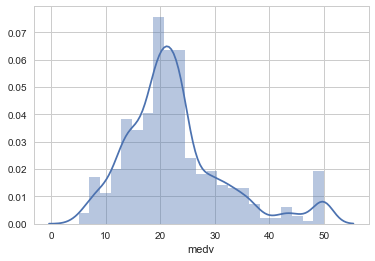

In [8]:
sns.distplot(boston_df['medv'])
plt.show()

The distribution shows range of medv from 5k to 50k spiking at 20k(mode). 

There is a spike at 50k too. Where does that originate? What is the cause for the spike?

##### Review datapoints that create the right tail at medv=50

In [9]:
boston_df[boston_df['medv']==50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


In [10]:
boston_df[boston_df['medv']==50].shape

(16, 14)

###### What proportion of the dataset is bound by the Charles River?

In [11]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

This data point will be used later to create 2 sub groups for hypothesis testing.

##### Does average number of rooms per dwelling have a linear relationship with median value of owner-occupied homes. Use visualization to determine.

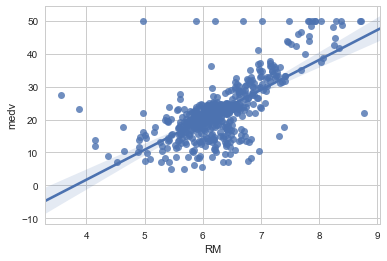

In [12]:
sns.regplot(x="RM",y="medv", data=boston_df)
plt.show()

##### Find 3 good predictors for mdev. Use visualization to observe linear relationship.

First do a pairplot of all datapoints to identify possible stron relationships and then further investigate each of those relationships.

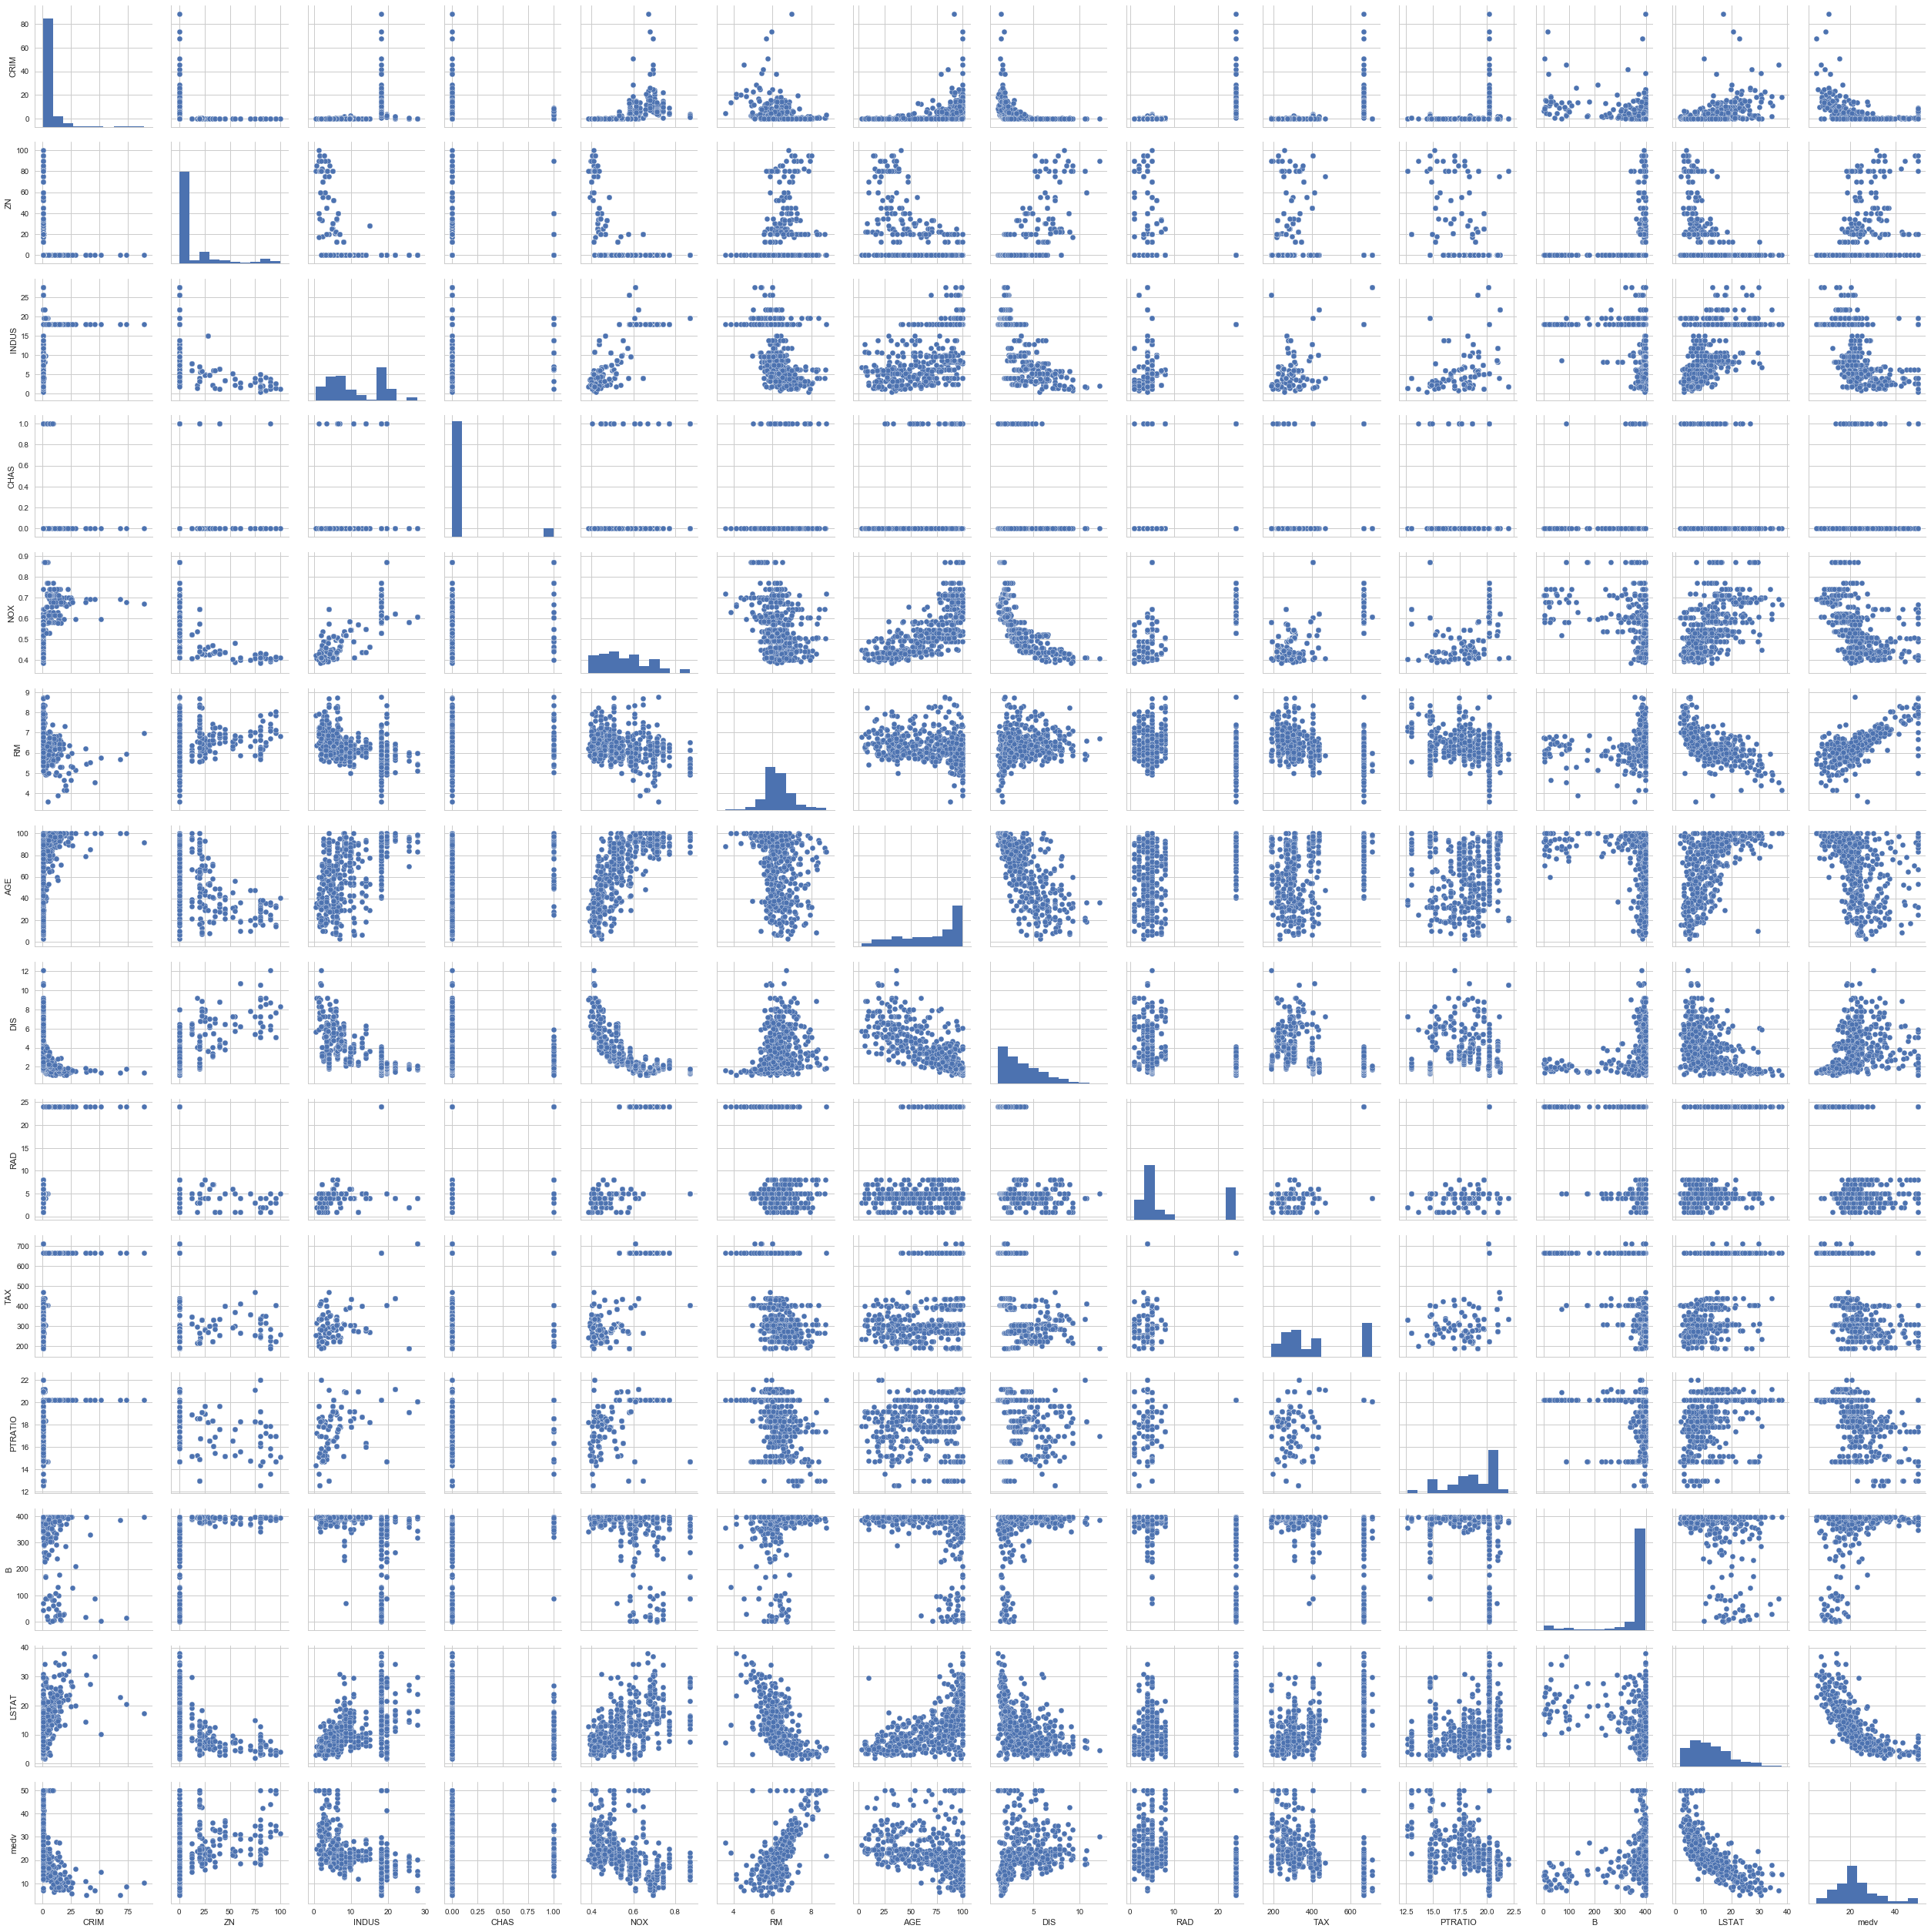

In [13]:
sns.pairplot(boston_df)
plt.show()

Looks like 'Dis', 'Age' and 'LSTAT' show a pattern in the pairplot. Lets explore them further.

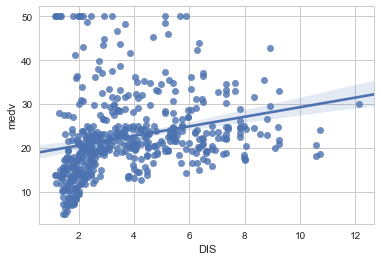

In [14]:
sns.regplot(x="DIS",y="medv", data=boston_df)
plt.show()

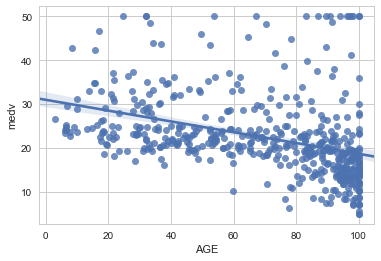

In [15]:
sns.regplot(x="AGE",y="medv", data=boston_df)
plt.show()

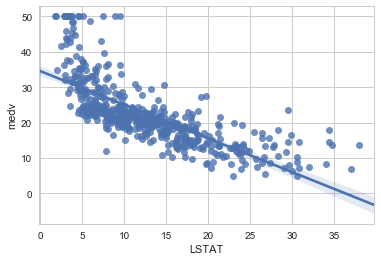

In [16]:
sns.regplot(x="LSTAT",y="medv", data=boston_df)
plt.show()

In [17]:
#Review correlations
corr=boston_df.corr()
corr.style.background_gradient(cmap='coolwarm')

### Inferential Statistics

###### Central Limit Theorem

"Given a dataset with unknown distribution (it could be uniform, binomial or completely random), the sample means will approximate the normal distribution."

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed. 

This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30). 

If the population is normal, then the theorem holds true even for samples smaller than 30. In fact, this also holds true even if the population is binomial, provided that min(np, n(1-p))> 5, where n is the sample size and p is the probability of success in the population. 

This means that we can use the normal probability model to quantify uncertainty when making inferences about a population mean based on the sample mean.

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://corporatefinanceinstitute.com/assets/Central-Limit-Theorem-CLT-Diagram-1200x734.png")

In [19]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/600px-IllustrationCentralTheorem.png")

Additional Reference:
http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html

###### Is medv normally distributed?

There are different ways to confirm normality.
1) Visual observation with a distribution plot.
2) Test for normality.
3) Q-Q Plot

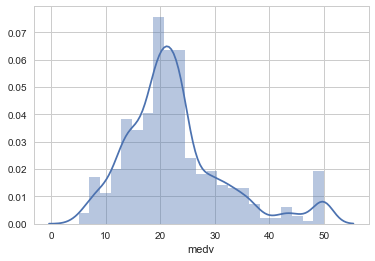

In [20]:
#Plot distribution of medv to visually confirm normality
sns.distplot(boston_df['medv'])
plt.show()

In [21]:
#Test for normality
k2,pval=spstats.mstats.normaltest(boston_df.medv)
print("P-Value = ",pval)

P-Value =  1.75831888717e-20


With alpha at 0.05, Medv is normally distributed distributed since p-value is less than alpha.

###### Q-Q Plot for MEDV

In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

We do this by generating a normal dataset with mean and standard deviation of our data point. Plot the quantiles of the generated normal distribution against the quantiles of the observed datapoints, this should generate a 45 degree line if the datapoint is normally distributed.

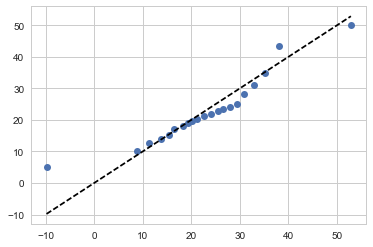

In [22]:
normal_data=np.random.normal(boston_df['medv'].mean(),boston_df['medv'].std(),boston_df['medv'].count())
percs = np.linspace(0,100,21)
qn_normal_data = np.percentile(normal_data, percs)
qn_boston_medv = np.percentile(boston_df['medv'], percs)
plt.plot(qn_normal_data,qn_boston_medv, ls="", marker="o")
x = np.linspace(np.min((normal_data.min(),boston_df['medv'].min())), np.max((normal_data.max(),boston_df['medv'].max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

###### Is the sample size large?

For a small dataset n<=30 we use t tests, for a large dataset n>30 we use z test.

In [23]:
sample_size=boston_df.shape[0]
print("Sample Size:",sample_size)
if (sample_size>30):
    print('Large Sample : Use z-test')
else :
    print ('Small Sample : Use t-test')

Sample Size: 506
Large Sample : Use z-test


###### Is 21.2 the true population mean?

The sample mean for medv is 22.53. Let's use 21.2(the median) to test for population mean? 

To run the hypothesis test, we would use a one sample test since we are estimating true popultion mean from a single sample.

###### One Sample Z test

A one-sample z-test is used to test whether a population parameter is significantly different from some hypothesized value.

Hypothesis: 
    
Hypothesis : Is the true population mean really 22.53? 
    Ho : Mu=21.2 
    Ha : Mu!=21.2
    This is a 2 sided test. We reject Ho if P-Value is less than level of significance of 0.05.


In [24]:
import math
#Calculate z-statistic
xbar,stddev=boston_df["medv"].mean(),boston_df["medv"].std()
mu=21.2

zstatistic=(xbar-mu)/(stddev/math.sqrt(sample_size))
print("Z Statistic =",zstatistic)

Z Statistic = 3.2598018478112643


In [25]:
#Calculate pvalue from Z Statistic = Use *2 since it is a 2 tailed test
p_value=spstats.norm.sf(abs(zstatistic))*2
print("P Value = ",p_value)

P Value =  0.0011149007574


In [26]:
#Calculate 2-tailed Confidence Interval - CI at 95% Confidence 
zalphaby2=spstats.norm.ppf(0.975)
MarginOfError=zalphaby2*(stddev/math.sqrt(sample_size))
zCIUpperLimit=xbar+(zalphaby2*(stddev/math.sqrt(sample_size)))
zCILowerLimit=xbar-(zalphaby2*(stddev/math.sqrt(sample_size)))
print("Confidence Interval of 2 tailed z test at 95% confidence - (",round(zCILowerLimit,2),"F,",round(zCIUpperLimit,2),"F )")

Confidence Interval of 2 tailed z test at 95% confidence - ( 21.73 F, 23.33 F )


###### Hypothesis - Two Sample Test for Means - Large Sample - Indepedent - z-test

Hypothesis : Is there a significant difference between Charles River bound vs. non Charles River bound price?
    Ho : Mu1-Mu2=0 
    Ha : Mu1-Mu2!=0 
    This is a 2 sided test. We reject Ho if P-Value is less than level of significance of 0.05.

In [27]:
#Create sub datasets based on Charles River bound datapoint
charles_bound=boston_df[boston_df['CHAS']==1]
charles_nonbound=boston_df[boston_df['CHAS']==0]

In [28]:
#Calculate z-statistic
cbxbar,cbstddev=charles_bound.medv.mean(),charles_bound.medv.std()
cnbxbar,cnbstddev=charles_nonbound.medv.mean(),charles_nonbound.medv.std()
zstatistic=(cbxbar-cnbxbar)/(math.sqrt(((cbstddev**2)/charles_bound.size)+((cnbstddev**2)/charles_nonbound.size)))
print("Z Statistic =",zstatistic)

Z Statistic = 11.648869437697916


In [29]:
#Calculate pvalue from Z Statistic = Use *2 since it is a 2 tailed test
p_value=spstats.norm.sf(abs(zstatistic))*2
print("P Value = ",p_value)

P Value =  2.32523121971e-31


Since, P Value is less than level of significance of 0.05, We reject the null hypothesis that there is no significant difference between Charles River bound and non Charles River bound.

##### HW : 
    
##### Try the tests for other variables : LSTAT, AGE, DIS